# 👗 **H&M Personalized Fashion Recommendations**

This notebook presents a post-competition study of the [H&M Personalized Fashion Recommendation](https://www.kaggle.com/competitions/h-and-m-personalized-fashion-recommendations/overview) challenge hosted on Kaggle, where H&M Group invites us to develop product recommendations based on data from previous transactions, as well as from customer and product meta data. The available meta data spans from simple data, such as garment type and customer age, to text data from product descriptions, to image data from garment images.

**Introduction**

Recommender systems play a central role in modern e-commerce. The H\&M competition presents a unique opportunity to build personalized fashion recommendations using diverse sources of information: transactions, product descriptions, and images. In this study, we aim to build, evaluate, and analyze several recommendation strategies.

**📁 Dataset description**

The dataset includes the following key files:
* *`transactions_train.csv`* - Customer purchases with timestamps.
* *`articles.csv`* - Article metadata including product type, color, and name.
* *`customers.csv`* - Customer attributes such as age and fashion profile.
* *`images/`* - Folder with article images (not all articles have an image).

## **Exploratory data analysis (EDA)**

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define custom palette
custom_palette = [
    "#4C72B0",  # muted blue
    "#6A5ACD",  # slate blue
    "#836FFF",  # medium purple
    "#B39DDB",  # light lavender
    "#3C2C7A",  # deep indigo/navy
    "#9FA8DA",  # pastel periwinkle
]
sns.set_palette(custom_palette)

# Set seaborn plot theme
sns.set_style("whitegrid")

# Set custom grid style with dotted, thin, grey lines
plt.rcParams['grid.color'] = 'grey'
plt.rcParams['grid.linestyle'] = ':'
plt.rcParams['grid.linewidth'] = 0.5
plt.rcParams['axes.grid'] = True
plt.rcParams['axes.facecolor'] = 'white'

sns.set_context("notebook", font_scale=1.2)
plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.spines.top"] = False
plt.rcParams["axes.spines.bottom"] = False
plt.rcParams["axes.spines.left"] = False
plt.rcParams["figure.figsize"] = (10, 4)

In [50]:
# Load data
transactions = pd.read_csv("/content/transactions_train.csv")
articles = pd.read_csv("/content/articles.csv")
customers = pd.read_csv("/content/customers.csv")

In [59]:
print("Transactions\n")
transactions.head()

Transactions



,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2


In [63]:
# Convert date column
transactions['t_dat'] = pd.to_datetime(transactions['t_dat'])

In [61]:
print("Articles\n")
articles.head()

Articles



,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


In [62]:
print("Customers\n")
customers.head()

Customers



,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


### Data visualizations

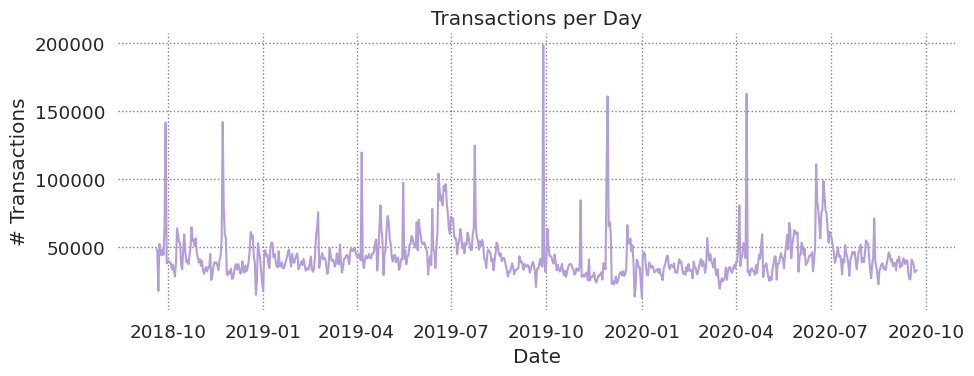

In [64]:
# Transaction volume by day
daily_tx = transactions.groupby('t_dat').size().reset_index(name='num_transactions')

sns.lineplot(data=daily_tx, x='t_dat', y='num_transactions', color=custom_palette[3])
plt.title("Transactions per Day")
plt.xlabel("Date")
plt.ylabel("# Transactions")

plt.tight_layout()
plt.show()

Transaction volume exhibits strong weekly and seasonal variations. There are regular sharp increases in transactions — likely seasonal sales, marketing campaigns, or holidays (e.g., Black Friday, Christmas, mid-year sales). These patterns inform our understanding of customer engagement and can be leveraged in time-aware recommendation models.

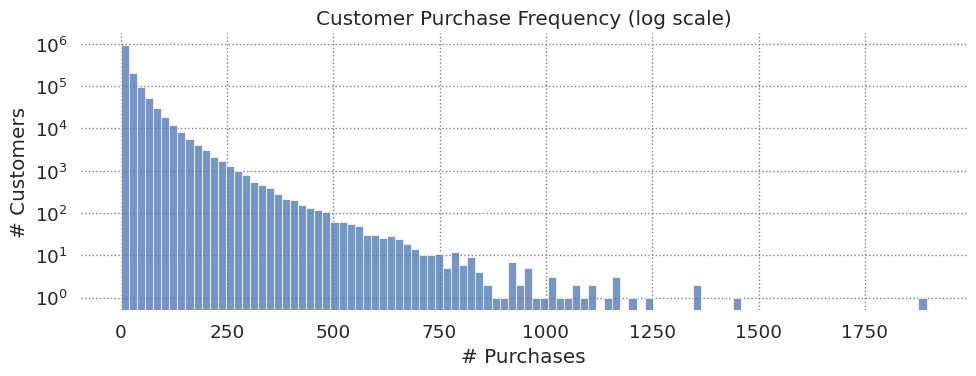

In [65]:
# Customer purchase frequency
cust_freq = transactions['customer_id'].value_counts()

sns.histplot(cust_freq, bins=100, log=True, color=custom_palette[0])
plt.title("Customer Purchase Frequency (log scale)")
plt.xlabel("# Purchases")
plt.ylabel("# Customers")

plt.tight_layout()
plt.show()

Most customers made a few purchases; a minority are highly active.

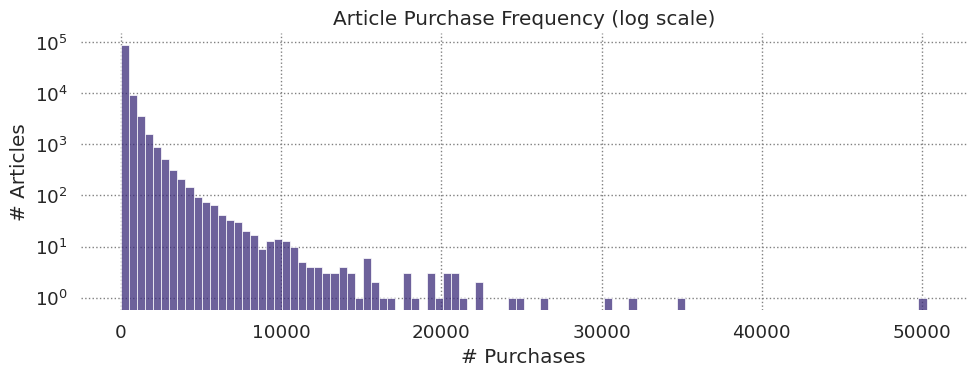

In [66]:
# Article popularity
article_freq = transactions['article_id'].value_counts()

sns.histplot(article_freq, bins=100, log=True, color=custom_palette[4])
plt.title("Article Purchase Frequency (log scale)")
plt.xlabel("# Purchases")
plt.ylabel("# Articles")

plt.tight_layout()
plt.show()

A few items are bought often; most receive little attention.

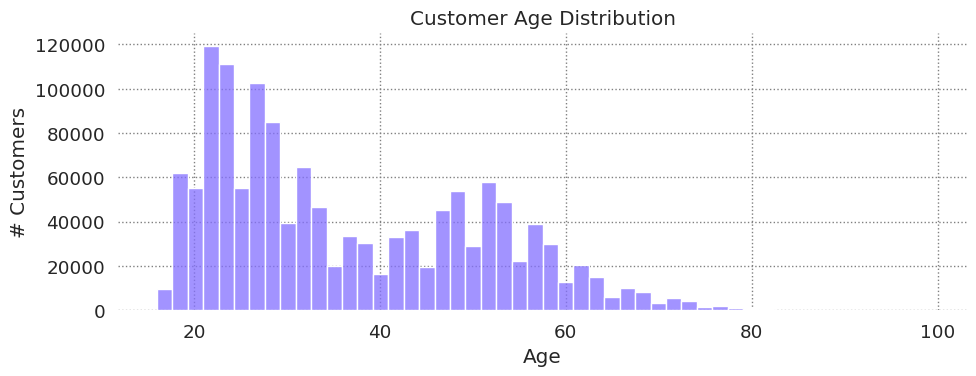

In [67]:
# Customer age distribution
sns.histplot(customers['age'].dropna(), bins=50, color=custom_palette[2])
plt.title("Customer Age Distribution")
plt.xlabel("Age")
plt.ylabel("# Customers")

plt.tight_layout()
plt.show()

Peak activity is among users aged 20$-$30.

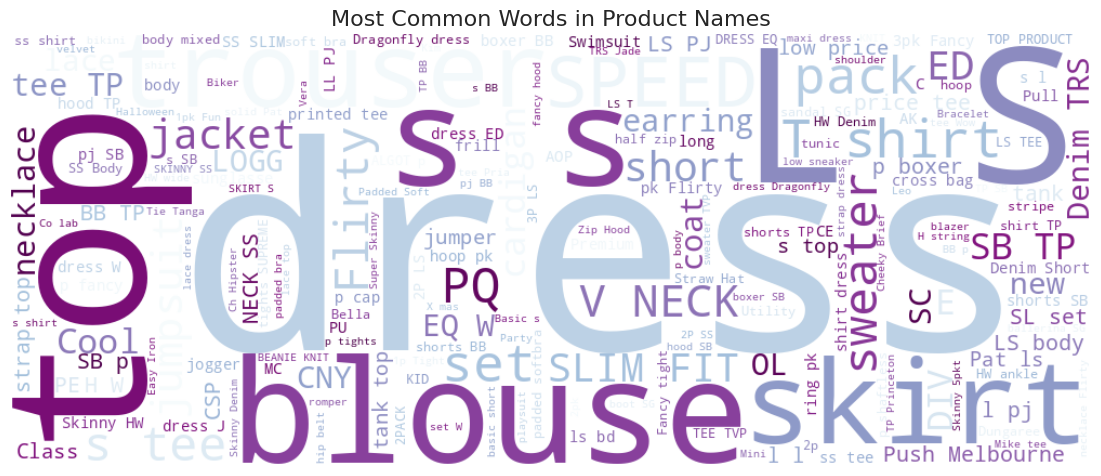

In [68]:
# Word Cloud (Text Features from Product Names)
from wordcloud import WordCloud

text = " ".join(articles['prod_name'].dropna().tolist())

wordcloud = WordCloud(width=1000, height=400, background_color='white',
                      colormap='BuPu').generate(text)

plt.figure(figsize=(15, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Most Common Words in Product Names", fontsize=16)

plt.tight_layout()
plt.show()

Dominant words include *dress*, *top*, *blouse*, and *skirt*.

## **Baseline models**
Our first approach uses simple heuristics:
* Let's recommend the most popular items globally to users.
* Let's introduce time-awarness, recomending the most popular items on the last week of training.

We generate 12 predictions per user and evaluate them using MAP@12, the competition's metric:

\begin{equation}
\text{MAP@12} = \frac{1}{U} \sum_{u=1}^{U} \frac{1}{\min(m,12)} \sum_{k=1}^{\min(n,12)} P(k) \cdot rel(k)
\end{equation}

### Global popularity model

We define a baseline by recommending the 12 most purchased articles in the training set to every user. Despite being non-personalized, this baseline can perform surprisingly well in domains with strong global item popularity.

To evaluate its performance, we hold out the last 7 days of the training data as a validation set. We compute MAP@12 by comparing the recommended list against each customer's actual purchases in this period.

In [69]:
# Choose cutoff for validation (last 7 days)
cutoff_date = transactions['t_dat'].max() - pd.Timedelta(days=7)

# Split into training and validation sets
train_tx = transactions[transactions['t_dat'] <= cutoff_date]
val_tx = transactions[transactions['t_dat'] > cutoff_date]

print("Training transactions:", len(train_tx))
print("Validation transactions:", len(val_tx))

Training transactions: 31548013
Validation transactions: 240311


In [70]:
# Get top 12 articles in training set
top_articles = (train_tx['article_id'].value_counts()
                                      .head(12)
                                      .index
                                      .astype(str)
                                      .tolist())

In [71]:
# Group validation purchases per customer
val_truth = (val_tx.groupby('customer_id')['article_id']
                   .apply(lambda x: list(map(str, x))))

In [80]:
# Predict top-12 articles for each customer in validation
val_preds = pd.Series([" ".join(top_articles)] * len(val_truth), index=val_truth.index)

In [81]:
def apk(actual, predicted, k=12):
    if not actual:
        return 0.0
    predicted = predicted[:k]
    score = 0.0
    num_hits = 0.0
    for i, p in enumerate(predicted):
        if p in actual and p not in predicted[:i]:
            num_hits += 1.0
            score += num_hits / (i + 1.0)
    return score / min(len(actual), k)

def mapk(actual_series, predicted_series, k=12):
    return actual_series.combine(predicted_series, lambda a, p: apk(a, p.split(), k)).mean()

In [82]:
map12_score = mapk(val_truth, val_preds)
print(f"Global Popularity MAP@12: {map12_score:.5f}")

Global Popularity MAP@12: 0.00265


The global popularity model achieved a MAP@12 score of 	0.00265. This low score reflects the limitations of recommending the same top 12 most purchased articles to all users without personalization. While this serves as a basic benchmark, it underscores the need for user-specific and time-aware strategies to improve predictive accuracy.

### Time-aware popularity model
To incorporate temporal dynamics, we also evaluate a baseline that recommends the 12 most purchased items from the final 7 days of the training period. This strategy aims to capture short-term trends in customer preferences that static global popularity may overlook.

The same 7-day window is used for validation.

In [84]:
start_date = transactions['t_dat'].max() - pd.Timedelta(days=14)
end_date = transactions['t_dat'].max() - pd.Timedelta(days=7)

top_recent_articles = (transactions[(start_date < transactions['t_dat']) & (transactions['t_dat'] <= end_date)]['article_id']
                       .value_counts()
                       .head(12)
                       .index
                       .astype(str)
                       .tolist())

In [85]:
val_preds = pd.Series([" ".join(top_recent_articles)] * len(val_truth), index=val_truth.index)

In [86]:
map12_score = mapk(val_truth, val_preds)
print(f"Time-Aware Popularity MAP@12: {map12_score:.5f}")

Time-Aware Popularity MAP@12: 0.00815


This time-aware model yielded a MAP@12 score of 0.00815, outperforming the global popularity baseline and suggesting that recency contributes positively to recommendation quality.

## **Collaborative filtering**
We now move beyond heuristic baselines to models that learn personalized patterns from the data. In this section, we explore collaborative filtering methods that use the structure of user-item interactions to infer preferences without relying on item metadata or users' demographic info. These models assume that users who interacted with similar items in the past are likely to share preferences in the future.

We explore matrix factorization methods using implicit feedback:
* ALS (Alternating Least Squares)
* LightFM with hybrid input

We construct the user-item matrix from transactions and tune hyperparameters using offline validation.

### Alternating Least Squares with implicit feedback

In this section, we implement collaborative filtering using the Alternating Least Squares (ALS) algorithm, a **matrix factorization technique** well-suited for **implicit feedback datasets**, that is, datasets where users **don't give explicit ratings** or preferences, but instead, we **infer interest** based on their **behavior**. In this context, user preferences are inferred from their historical interactions (i.e., purchases).

ALS factorizes the user-item interaction matrix into two low-rank matrices: one representing users in a latent feature space, and the other representing items in the same space. The dot product of these vectors estimates the user's affinity for the item.

Given the implicit nature of the data, we adopt the formulation by Hu, Koren, and Volinsky (2008), which treats interactions as confidence-weighted signals rather than binary preferences. Each user-item pair is assigned a confidence value (e.g., 1 for purchased, 0 otherwise), and the model optimizes the following loss function:

$$\min_{x_{*}, y_{*}} \sum_{(u, i)}\left(c_{u, i}(p_{u,i} - \bf{x}_u^{\top} \bf{y}_i \right)^2) + \lambda \left( \sum_{u}||x_{u}||^2 + \sum_{i}||y_{i}||^2 \right)$$

where:
* $p_{ui} \in \{0,1\}$ is the preference (1 if user $u$ interacted with item $i$),
* $c_{ui} = 1 + \alpha r_{ui}$ is the confidence level (based on the number of interactions $r_{ui}$),
* $x_u$ and $y_i$ are the user and item latent vectors,
* $\lambda$ is a regularization term.

ALS alternates between fixing user vectors to solve for item vectors, and vice versa, using least squares. This process converges quickly and scales well to large datasets.

(!!!!!!) *In our implementation, we used a 64-dimensional latent space and trained on the interaction matrix built from the training data. We excluded already-purchased items from the recommendations during evaluation. The model achieved a MAP@12 score of \texttt{[insert score here]}, significantly outperforming popularity-based baselines.* (!!!!!!)

In [95]:
from scipy.sparse import csr_matrix
import numpy as np

# Encode customer_id and article_id as numeric indices
customer_map = {cid: i for i, cid in enumerate(train_tx['customer_id'].unique())}
article_map = {aid: i for i, aid in enumerate(train_tx['article_id'].unique())}
inv_article_map = {i: aid for aid, i in article_map.items()}

train_tx.loc[:, 'user_idx'] = train_tx['customer_id'].map(customer_map)
train_tx.loc[:, 'item_idx'] = train_tx['article_id'].map(article_map)

# Build user-item sparse matrix
user_item_matrix = csr_matrix((
    np.ones(len(train_tx)),
    (train_tx['user_idx'], train_tx['item_idx'])
))

In [ ]:
from implicit.als import AlternatingLeastSquares

# Initialize the model
als_model = AlternatingLeastSquares(factors=64, regularization=0.1, iterations=15)

# Fit the model
als_model.fit(user_item_matrix)

## **TO BE CONTINUED**